In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
sp = pd.read_csv("SRC_projects/Speed Dating Data.csv", encoding= "unicode_escape") #encoding= "unicode_escape" nous permet ici de lire le dataset, l'encodage par défaut est UTF-8

print("total of rows: {}".format(sp.shape[0]))
print("total of columns: {}".format(sp.shape[1]))
print("Percentage of missing values by column: ")
(sp.isnull().sum()*100)/sp.shape[0]

total of rows: 8378
total of columns: 195
Percentage of missing values by column: 


iid          0.000000
id           0.011936
gender       0.000000
idg          0.000000
condtn       0.000000
              ...    
attr5_3     75.936978
sinc5_3     75.936978
intel5_3    75.936978
fun5_3      75.936978
amb5_3      75.936978
Length: 195, dtype: float64

In [3]:
missing_values = sp.isnull().sum()*100/sp.shape[0]

drop_liste = []
for key, value in missing_values.iteritems():
    if value > 30.0:
        drop_liste.append(key)

drop_liste #nous allons supprimer ces colonnes qui ne nous serviriont pas pour notre analyse

sp = sp.drop(drop_liste, axis=1)

In [4]:
# Après avoir fait un premier tour des colonnes, j'ai listé les colonnes que je souhaite déjà supprimer, car elles ne me seront pas utiles pour mon analyse.
columns_to_drop = [
    "positin1",
    "field_cd",
    "zipcode",
    "career_c"
] #elles sont soit déja représenté par une autre colonne, soit inutile selon moi pour la future analyse
sp = sp.drop(columns_to_drop, axis=1)

In [5]:
sp.columns = sp.columns.map(lambda x: x.capitalize()) # je rajoute une majuscule sur chaque nom de colonne

#les colonnes inutiles supprimées, je décide de couper mon dataset et de procéder à un nettoyage:
#renommer les colonnes pour plus de clarté
#remplacer certaines valeurs numériques par leur réelle signification
#nettoyage des 62 premières colonne
sp = sp.rename(columns={     
    "Condtn":"Condition",
    "Pid":"Partner iid",
    "Int_corr":"Correlation of interests",
    "Age_o":"Partner age",
    "Race_o":"Partner race",
    "Dec_o": "Partner decision",
}) 

sp["Gender"] = sp["Gender"].replace({0:"Female", 1:"Male"})
sp["Condition"] = sp["Condition"].replace({1:"limited choice", 2:"extensive choice"})
sp['Match'] = sp['Match'].replace({0:"no", 1:"yes"}) # colonne match
sp["Samerace"] = sp["Samerace"].replace({0:"no", 1:"yes"}) #samerace
sp["Partner decision"] = sp["Partner decision"].replace({0:"no", 1:"yes"})
sp["Dec"] = sp["Dec"].replace({0:"no",1:"yes"})

In [6]:
sp['Partner race'] = sp['Partner race'].replace({1:"Black/African American",
                                                 2:"European/Caucasian-American",
                                                 3:"Latino/Hispanic American",
                                                 4:"Asian/Pacific Islander/Asian-American",
                                                 5:"Native American",
                                                 6:"Other"})


sp['Race'] = sp['Race'].replace({1:"Black/African American",
                                 2:"European/Caucasian-American",
                                 3:"Latino/Hispanic American",
                                 4:"Asian/Pacific Islander/Asian-American",
                                 5:"Native American",
                                 6:"Other"})

sp["Goal"] = sp["Goal"].replace({1:"Seemed like a fun night out",
                                 2:"To meet new people",
                                 3:"To get a date",
                                 4:"Looking for a serious relationship",
                                 5:"To say I did it",
                                 6:"Other"}) 

sp["Date"] = sp["Date"].replace({1:"Several times a week",
                                2:"Twice a week",
                                3:"Once a week",
                                4:"Twice a month",
                                5:"Once a month",
                                6:"Several times a year",
                                7:"Almost never"})

sp["Go_out"] = sp["Go_out"].replace({1:"Several times a week",
                                2:"Twice a week",
                                3:"Once a week",
                                4:"Twice a month",
                                5:"Once a month",
                                6:"Several times a year",
                                7:"Almost never"})


In [7]:
sp['Id'] = sp['Id'].astype("Int64")
sp["Partner iid"] = sp["Partner iid"].astype("Int64") 
#astype(int) ne fonctionne pas car nous avons des valeurs manquantes
 #"Int64" fonctionne
sp["Partner age"] = sp["Partner age"].astype("Int64")
sp['Age'] = sp['Age'].astype("Int64")
sp["Imprace"] = sp["Imprace"].astype("Int64")
sp["Imprelig"] = sp["Imprelig"].astype("Int64")

In [8]:
print(f"Nombre de sujets au total: {sp['Iid'].max()}")
print(f"Nombre de sujets par groupe de genre: {sp['Idg'].max()}")
print(f"Nombre de sujets par vague: {sp['Id'].max()}")
print(f"nombre de vagues: {sp['Wave'].max()}")

Nombre de sujets au total: 552
Nombre de sujets par groupe de genre: 44
Nombre de sujets par vague: 22
nombre de vagues: 21


In [9]:
nbre_femmes_per_vague = sp[sp['Gender'] == 'Female'].groupby('Wave')['Id'].nunique()
nbre_femmes_per_vague

Wave
1     10
2     19
3     10
4     18
5      9
6      5
7     16
8     10
9     20
10     9
11    21
12    14
13    10
14    20
15    18
16     6
17    10
18     6
19    15
20     6
21    22
Name: Id, dtype: int64

In [10]:
nbre_hommes_per_vague = sp[sp['Gender'] == 'Male'].groupby('Wave')['Id'].nunique()

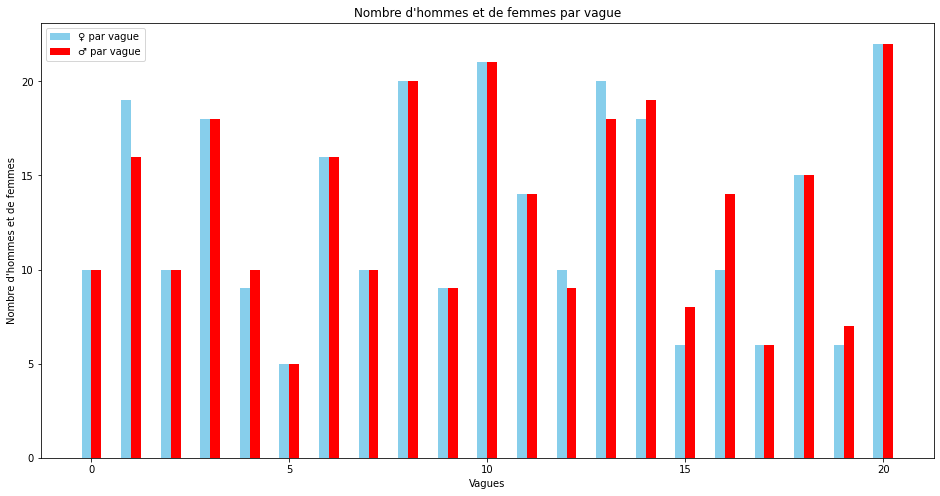

In [11]:
plt.figure(figsize=(16,8))
ind = np.arange(len(nbre_femmes_per_vague))
width = 0.25
plt.bar(ind - width/2, nbre_femmes_per_vague.values, width, color='SkyBlue', label='♀ par vague')
plt.bar(ind + width/2, nbre_hommes_per_vague.values, width, color='Red', label='♂ par vague')

plt.ylabel("Nombre d'hommes et de femmes")
plt.xlabel("Vagues")
plt.title("Nombre d'hommes et de femmes par vague")
plt.legend()

In [12]:
moyenne_age_par_genre = sp.groupby('Gender')['Age'].mean()
moyenne_partner_age_par_genre = sp.groupby('Gender')['Partner age'].mean() #On observe que la moyenne d'age est la meme pour les deux sexes.

Text(0.5, 1.0, "Moyenne d'age du partenaire par genre")

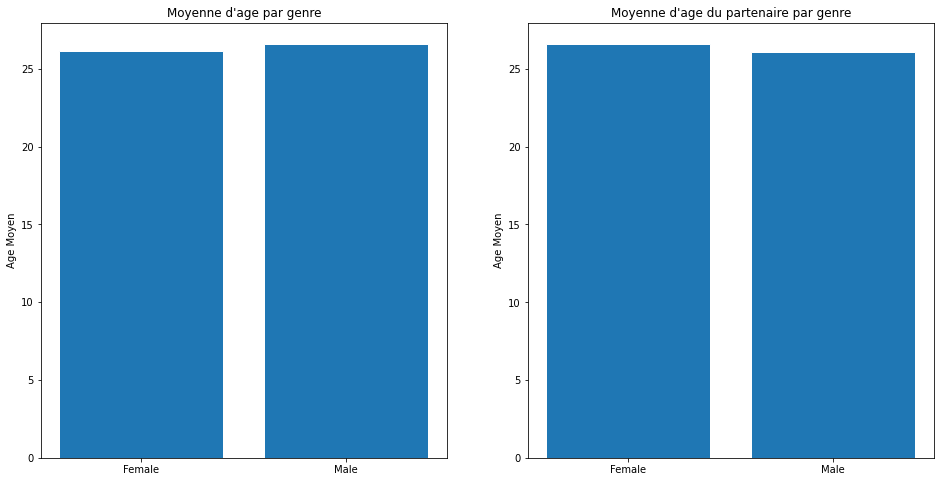

In [13]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.bar(moyenne_age_par_genre.index, moyenne_age_par_genre.values, edgecolor='white')
plt.ylabel("Age Moyen")
plt.title("Moyenne d'age par genre")

plt.subplot(1,2,2)
plt.bar(moyenne_partner_age_par_genre.index, moyenne_partner_age_par_genre.values, edgecolor='white')
plt.ylabel("Age Moyen")
plt.title("Moyenne d'age du partenaire par genre")

In [14]:
nbre_matchs_positifs_per_wave = sp[sp['Match']=='yes'].groupby('Wave')['Match'].value_counts()
nbre_matchs_positifs_per_wave
nbre_matchs_negatifs_per_wave = sp[sp['Match']=='no'].groupby('Wave')['Match'].value_counts()

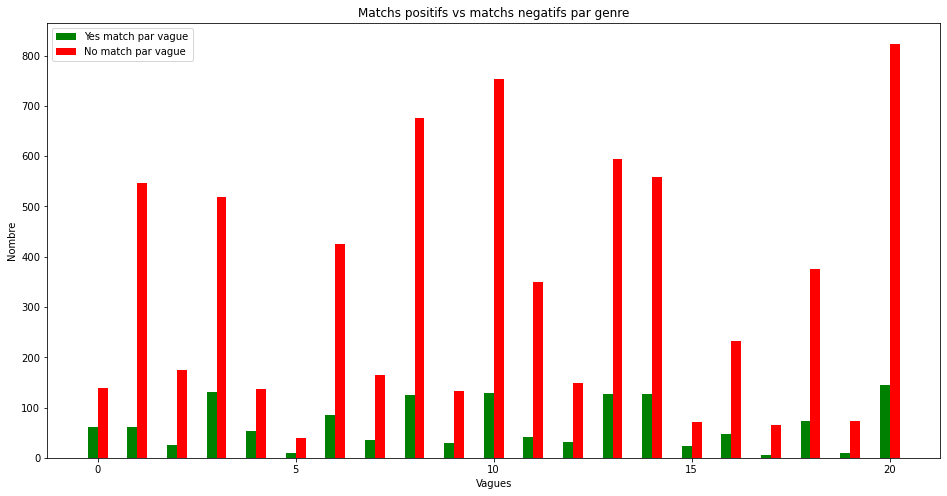

In [15]:
plt.figure(figsize=(16,8))
ind = np.arange(len(nbre_matchs_positifs_per_wave))
width = 0.25
plt.bar(ind - width/2, nbre_matchs_positifs_per_wave.values, width, color='green', label='Yes match par vague')
plt.bar(ind + width/2, nbre_matchs_negatifs_per_wave.values, width, color='red', label='No match par vague')

plt.ylabel("Nombre")
plt.xlabel("Vagues")
plt.title("Matchs positifs vs matchs negatifs par genre")
plt.legend()

In [16]:
nbre_matchs_per_samerace = sp[sp['Samerace']=='yes']['Match'].value_counts()
nbre_matchs_not_samerace = sp[sp['Samerace']=='no']['Match'].value_counts()
print(nbre_matchs_per_samerace)
print(nbre_matchs_not_samerace)

no     2750
yes     566
Name: Match, dtype: int64
no     4248
yes     814
Name: Match, dtype: int64


Text(0.5, 1.0, 'rapport de matchs pour des races différentes')

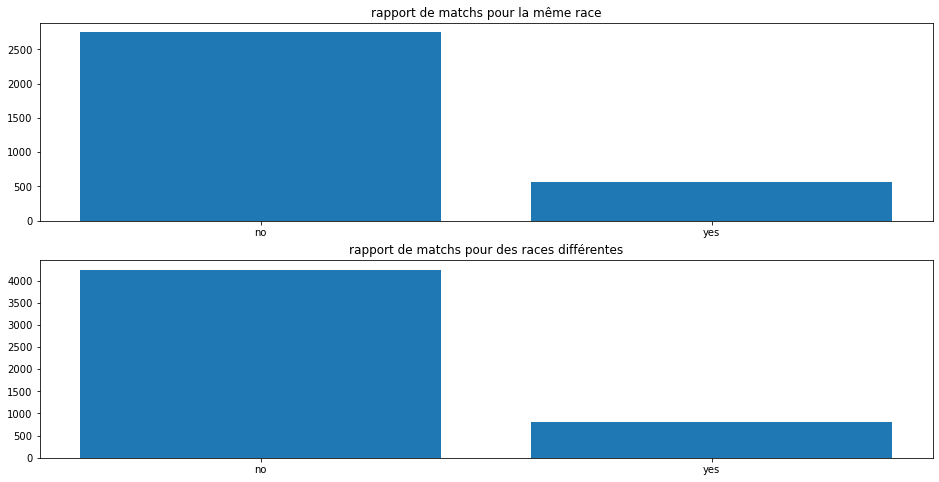

In [17]:
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.bar(nbre_matchs_per_samerace.index, nbre_matchs_per_samerace.values)
plt.title("rapport de matchs pour la même race")
plt.subplot(2,1,2)
plt.bar(nbre_matchs_not_samerace.index, nbre_matchs_not_samerace.values)
plt.title("rapport de matchs pour des races différentes")

In [18]:
nbre_matchs_positifs_per_race = sp[sp['Match']=='yes'].groupby('Partner race')['Match'].count()
nbre_matchs_positifs_per_race

Partner race
Asian/Pacific Islander/Asian-American    267
Black/African American                    85
European/Caucasian-American              788
Latino/Hispanic American                 123
Other                                    103
Name: Match, dtype: int64

In [19]:
nbre_personnes_par_race = sp.groupby('Race')['Iid'].nunique()
no_match_per_race = sp[sp['Match']=='no'].groupby('Partner race')['Match'].count()

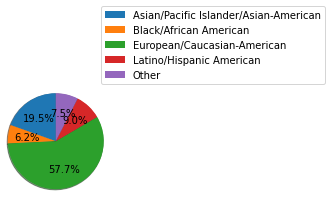

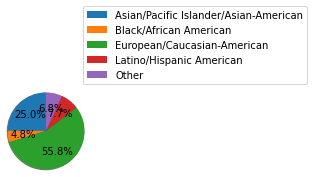

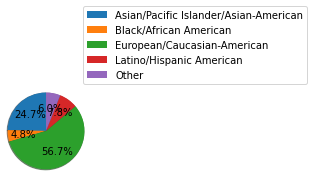

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(3,1,1)
plt.pie(nbre_matchs_positifs_per_race,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90,
       radius=1.5)
plt.legend(nbre_matchs_positifs_per_race.index, bbox_to_anchor=(1,1.15))
plt.show()

plt.subplot(3,1,2)
plt.pie(nbre_personnes_par_race,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90,
       radius=1.5)
plt.legend(nbre_personnes_par_race.index, bbox_to_anchor=(1,1.15))
plt.show()

plt.subplot(3,1,3)
plt.pie(no_match_per_race,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90,
       radius=1.5)
plt.legend(no_match_per_race.index, bbox_to_anchor=(1,1.15))

In [21]:
nbre_matchs_per_race= sp.groupby('Partner race')['Match'].count()

In [22]:
sp[sp['Match']=='yes'].groupby('Gender')['Correlation of interests'].mean()

Gender
Female    0.217319
Male      0.217319
Name: Correlation of interests, dtype: float64

In [23]:
sp.groupby('Match')['Correlation of interests'].mean()

Match
no     0.191822
yes    0.217319
Name: Correlation of interests, dtype: float64

In [24]:
sp.groupby('Iid')['Correlation of interests'].mean()

Iid
1      0.267000
2      0.258000
3     -0.136000
4     -0.007000
5     -0.079000
         ...   
548    0.048182
549    0.192727
550    0.406818
551    0.320909
552    0.460000
Name: Correlation of interests, Length: 551, dtype: float64

In [25]:
partner_preferences = pd.DataFrame(sp.loc[:, 'Pf_o_att':'Pf_o_sha'], index=sp['Partner iid'])

In [26]:
partner_preferences['Partner decision'] = sp['Partner decision']

In [27]:
partner_preferences['Wave'] = sp['Wave']
partner_preferences['Partner race'] = sp['Partner race']
partner_preferences['Match'] = sp['Match']

In [28]:
partner_preferences[partner_preferences['Partner decision']=='yes'].head()

,Pf_o_att,Pf_o_sin,Pf_o_int,Pf_o_fun,Pf_o_amb,Pf_o_sha,Partner decision,Wave,Partner race,Match
Partner iid,,,,,,,,,,
12,19.00,18.00,19.00,18.00,14.00,12.00,yes,1.0,Asian/Pacific Islander/Asian-American,no
13,30.00,5.00,15.00,40.00,5.00,5.00,yes,1.0,European/Caucasian-American,yes
14,30.00,10.00,20.00,10.00,10.00,20.00,yes,1.0,Latino/Hispanic American,no
15,50.00,0.00,30.00,10.00,0.00,10.00,yes,1.0,European/Caucasian-American,no
17,33.33,11.11,11.11,11.11,11.11,22.22,yes,1.0,European/Caucasian-American,no


In [29]:
pp_list = ['Pf_o_att','Pf_o_sin','Pf_o_int','Pf_o_fun','Pf_o_amb','Pf_o_sha']

In [30]:
for x in pp_list:
    print(f" {x}: {partner_preferences[x].mean()}") #moyenne des attentes du partenaire
#attractif, intelligent et marrant

 Pf_o_att: 27.807221151529724
 Pf_o_sin: 16.60459527824621
 Pf_o_int: 21.668640086726068
 Pf_o_fun: 18.41548422066973
 Pf_o_amb: 7.029191761021445
 Pf_o_sha: 9.18761744158034


In [31]:
dic_attentes_partenaire = {
    'Pf_o_att':27.807221151529724,
    'Pf_o_sin':16.60459527824621,
    'Pf_o_int':21.668640086726068,
    'Pf_o_fun':18.41548422066973,
    'Pf_o_amb':7.029191761021445,
    'Pf_o_sha':9.18761744158034
}

<BarContainer object of 6 artists>

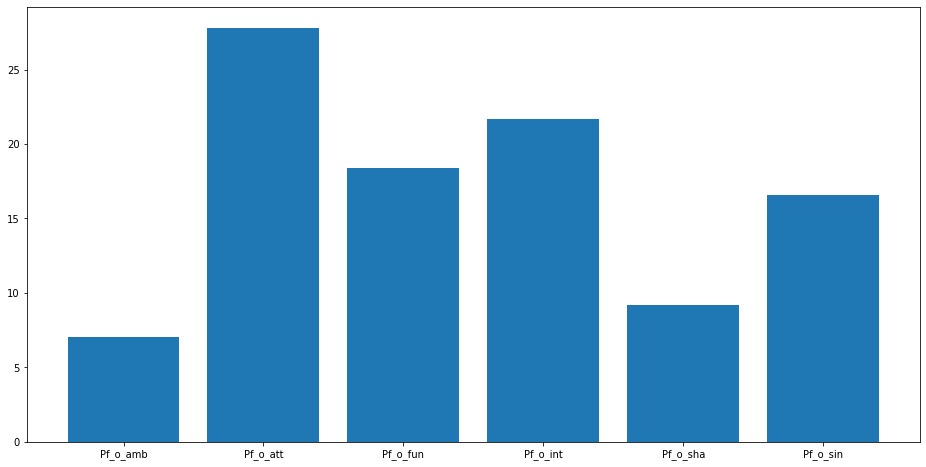

In [32]:
x, y = zip(*sorted(list(dic_attentes_partenaire.items()))) #technique pas mal pour un plot rapide 

plt.figure(figsize=(16,8))
plt.bar(x, y)

In [33]:
attractive_by_race = partner_preferences.groupby('Partner race')['Pf_o_att'].mean()
sincere_by_race = partner_preferences.groupby('Partner race')['Pf_o_sin'].mean()
intelligent_by_race = partner_preferences.groupby('Partner race')['Pf_o_int'].mean()
fun_by_race = partner_preferences.groupby('Partner race')['Pf_o_fun'].mean()
ambitious_by_race = partner_preferences.groupby('Partner race')['Pf_o_amb'].mean()
shared_by_race = partner_preferences.groupby('Partner race')['Pf_o_sha'].mean()


In [34]:
ambitious_by_race

Partner race
Asian/Pacific Islander/Asian-American     8.365620
Black/African American                   10.000000
European/Caucasian-American               5.762377
Latino/Hispanic American                 14.726562
Other                                    10.000000
Name: Pf_o_amb, dtype: float64

In [35]:
partner_preferences.head(15)

,Pf_o_att,Pf_o_sin,Pf_o_int,Pf_o_fun,Pf_o_amb,Pf_o_sha,Partner decision,Wave,Partner race,Match
Partner iid,,,,,,,,,,
11,60.00,0.00,0.00,40.00,0.00,0.00,no,1.0,European/Caucasian-American,no
12,19.00,18.00,19.00,18.00,14.00,12.00,yes,1.0,Asian/Pacific Islander/Asian-American,no
13,30.00,5.00,15.00,40.00,5.00,5.00,yes,1.0,European/Caucasian-American,yes
14,30.00,10.00,20.00,10.00,10.00,20.00,yes,1.0,Latino/Hispanic American,no
15,50.00,0.00,30.00,10.00,0.00,10.00,yes,1.0,European/Caucasian-American,no
16,35.00,15.00,25.00,10.00,5.00,10.00,no,1.0,European/Caucasian-American,no
17,33.33,11.11,11.11,11.11,11.11,22.22,yes,1.0,European/Caucasian-American,no
18,50.00,0.00,25.00,10.00,0.00,15.00,yes,1.0,European/Caucasian-American,yes
19,100.00,0.00,0.00,0.00,0.00,0.00,no,1.0,European/Caucasian-American,no


In [36]:
subject_ratings_of_partner = pd.DataFrame(sp.loc[:, 'Attr_o':'Met_o'], index=sp['Iid'])
#Nous allons pouvoir analyser ce qui a poussé les gens a dire oui ou non

In [37]:
subject_ratings_of_partner['Gender'] = sp['Gender']
subject_ratings_of_partner['Iid'] = sp['Iid']
subject_ratings_of_partner['Dec'] = sp['Dec']
subject_ratings_of_partner['Match'] = sp['Match']

In [38]:
subject_ratings_of_partner.isnull().sum()*100/subject_ratings_of_partner.shape[0]

Attr_o      1.014562
Sinc_o      2.315588
Intel_o     2.828837
Fun_o       2.721413
Amb_o       5.633803
Shar_o     13.774170
Like_o      1.098114
Prob_o      4.619241
Met_o       1.682979
Gender      0.000000
Iid         0.000000
Dec         0.000000
Match       0.000000
dtype: float64

In [39]:
subject_ratings_of_partner = subject_ratings_of_partner.dropna()

In [40]:
subject_ratings_of_partner.head(10)

,Attr_o,Sinc_o,Intel_o,Fun_o,Amb_o,Shar_o,Like_o,Prob_o,Met_o,Gender,Iid,Dec,Match
Iid,,,,,,,,,,,,,
1,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,Female,1,yes,no
1,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,Female,1,yes,no
1,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,Female,1,yes,no
1,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,Female,1,yes,no
1,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,Female,1,yes,no
1,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,Female,1,yes,no
1,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,Female,1,yes,no
1,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,Female,1,yes,no
1,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,Female,1,yes,no


In [41]:
sr_list = ['Attr_o','Sinc_o','Intel_o','Fun_o','Amb_o','Shar_o']

In [42]:
for x in sr_list:
    print(subject_ratings_of_partner[subject_ratings_of_partner['Gender']=='Female'].groupby('Gender')[x].mean())
    print(subject_ratings_of_partner[subject_ratings_of_partner['Gender']=='Male'].groupby('Gender')[x].mean())

Gender
Female    6.531357
Name: Attr_o, dtype: float64
Gender
Male    5.40536
Name: Attr_o, dtype: float64
Gender
Female    7.214761
Name: Sinc_o, dtype: float64
Gender
Male    7.030151
Name: Sinc_o, dtype: float64
Gender
Female    7.430127
Name: Intel_o, dtype: float64
Gender
Male    7.420994
Name: Intel_o, dtype: float64
Gender
Female    6.722726
Name: Fun_o, dtype: float64
Gender
Male    5.876605
Name: Fun_o, dtype: float64
Gender
Female    6.915709
Name: Amb_o, dtype: float64
Gender
Male    6.750419
Name: Amb_o, dtype: float64
Gender
Female    5.615648
Name: Shar_o, dtype: float64
Gender
Male    5.316583
Name: Shar_o, dtype: float64


In [43]:
att_mean = subject_ratings_of_partner[subject_ratings_of_partner['Dec']=='yes'].groupby('Gender')['Attr_o'].mean()
sinc_mean = subject_ratings_of_partner[subject_ratings_of_partner['Dec']=='yes'].groupby('Gender')['Sinc_o'].mean()
intel_mean = subject_ratings_of_partner[subject_ratings_of_partner['Dec']=='yes'].groupby('Gender')['Intel_o'].mean()
fun_mean = subject_ratings_of_partner[subject_ratings_of_partner['Dec']=='yes'].groupby('Gender')['Fun_o'].mean()
amb_mean = subject_ratings_of_partner[subject_ratings_of_partner['Dec']=='yes'].groupby('Gender')['Amb_o'].mean()
shar_mean = subject_ratings_of_partner[subject_ratings_of_partner['Dec']=='yes'].groupby('Gender')['Shar_o'].mean()

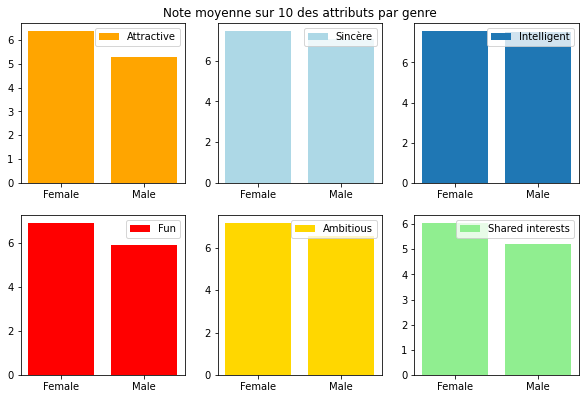

In [44]:
plt.figure(figsize=(10,10))

plt.subplot(3,3,1)
plt.bar(att_mean.index, att_mean.values, color='orange', label = 'Attractive')
plt.legend()

plt.subplot(3,3,2)
plt.bar(sinc_mean.index, sinc_mean.values, color='lightblue', label='Sincère')
plt.legend()
plt.title("Note moyenne sur 10 des attributs par genre")

plt.subplot(3,3,3)
plt.bar(intel_mean.index, intel_mean.values, label='Intelligent')
plt.legend()

plt.subplot(3,3,4)
plt.bar(fun_mean.index, fun_mean.values, color='red', label="Fun")
plt.legend()

plt.subplot(3,3,5)
plt.bar(amb_mean.index, amb_mean.values, color='gold', label='Ambitious')
plt.legend()

plt.subplot(3,3,6)
plt.bar(shar_mean.index, shar_mean, color='lightgreen', label="Shared interests")
plt.legend()



In [45]:
goal_per_femme = sp[sp['Gender']=='Female'].groupby('Iid')['Goal'].unique() #goal pour chaque femme
goal_per_homme = sp[sp['Gender']=='Male'].groupby('Iid')['Goal'].unique() #goal pour chaque homme

date_per_femme = sp[sp['Gender']=='Female'].groupby('Iid')['Date'].unique()
date_per_homme = sp[sp['Gender']=='Male'].groupby('Iid')['Date'].unique()

go_out_per_femme = sp[sp['Gender']=='Female'].groupby('Iid')['Go_out'].unique()
go_out_per_homme = sp[sp['Gender']=='Male'].groupby('Iid')['Go_out'].unique()

In [108]:
sp.groupby('Goal')['Iid'].count()*100 / len(sp)

Goal
Looking for a serious relationship     3.592743
Other                                  5.001194
Seemed like a fun night out           40.892815
To get a date                          7.531630
To meet new people                    35.951301
To say I did it                        6.087372
Name: Iid, dtype: float64

In [46]:
sp.iloc[:, 20:40].head()

,Pf_o_amb,Pf_o_sha,Partner decision,Attr_o,Sinc_o,Intel_o,Fun_o,Amb_o,Shar_o,Like_o,Prob_o,Met_o,Age,Field,Race,Imprace,Imprelig,From,Goal,Date
0,0.0,5.0,no,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21,Law,Asian/Pacific Islander/Asian-American,2,4,Chicago,To meet new people,Almost never
1,0.0,0.0,no,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21,Law,Asian/Pacific Islander/Asian-American,2,4,Chicago,To meet new people,Almost never
2,14.0,12.0,yes,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21,Law,Asian/Pacific Islander/Asian-American,2,4,Chicago,To meet new people,Almost never
3,5.0,5.0,yes,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21,Law,Asian/Pacific Islander/Asian-American,2,4,Chicago,To meet new people,Almost never
4,10.0,20.0,yes,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21,Law,Asian/Pacific Islander/Asian-American,2,4,Chicago,To meet new people,Almost never


In [47]:
hobbies = pd.DataFrame(sp.loc[:, 'Sports':'Yoga'], index=sp['Iid'])

In [48]:
hobbies['Match'] = sp['Match']

In [49]:
hobbies['Gender'] = sp['Gender']

In [50]:
hobbies.head()

,Sports,Tvsports,Exercise,Dining,Museums,Art,Hiking,Gaming,Clubbing,Reading,Tv,Theater,Movies,Concerts,Music,Shopping,Yoga,Match,Gender
Iid,,,,,,,,,,,,,,,,,,,
1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,no,Female
1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,no,Female
1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,no,Female
1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,no,Female
1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,no,Female


In [51]:
sp[sp['Match']=='yes'].groupby('Gender')['Exphappy'].mean()

Gender
Female    5.306333
Male      5.976642
Name: Exphappy, dtype: float64

In [52]:
sp[sp['Match']=='no'].groupby('Gender')['Exphappy'].mean()

Gender
Female    5.131133
Male      5.887074
Name: Exphappy, dtype: float64

In [53]:
sp.loc[:, 'Attr1_1':'Shar1_1'].head() # Ce que vous cherchez chez l'autre:

,Attr1_1,Sinc1_1,Intel1_1,Fun1_1,Amb1_1,Shar1_1
0,15.0,20.0,20.0,15.0,15.0,15.0
1,15.0,20.0,20.0,15.0,15.0,15.0
2,15.0,20.0,20.0,15.0,15.0,15.0
3,15.0,20.0,20.0,15.0,15.0,15.0
4,15.0,20.0,20.0,15.0,15.0,15.0


In [54]:
# Ce que vous pensez que votre sexe cherche en general : 
sp.loc[:, 'Attr4_1':'Shar4_1'].head()

,Attr4_1,Sinc4_1,Intel4_1,Fun4_1,Amb4_1,Shar4_1
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Ce que vous pensez que l'autre sexe cherche : 
sp.loc[:, 'Attr2_1':'Shar2_1'].head()

,Attr2_1,Sinc2_1,Intel2_1,Fun2_1,Amb2_1,Shar2_1
0,35.0,20.0,15.0,20.0,5.0,5.0
1,35.0,20.0,15.0,20.0,5.0,5.0
2,35.0,20.0,15.0,20.0,5.0,5.0
3,35.0,20.0,15.0,20.0,5.0,5.0
4,35.0,20.0,15.0,20.0,5.0,5.0


In [56]:
# Quelle note vous donnez vous sur 10:
sp.loc[:, 'Attr3_1':'Amb3_1'].head()

,Attr3_1,Sinc3_1,Fun3_1,Intel3_1,Amb3_1
0,6.0,8.0,8.0,8.0,7.0
1,6.0,8.0,8.0,8.0,7.0
2,6.0,8.0,8.0,8.0,7.0
3,6.0,8.0,8.0,8.0,7.0
4,6.0,8.0,8.0,8.0,7.0


In [57]:
#Décision
sp.loc[:, ['Iid','Gender','Match','Partner decision','Dec','Match_es']]

,Iid,Gender,Match,Partner decision,Dec,Match_es
0,1,Female,no,no,yes,4.0
1,1,Female,no,no,yes,4.0
2,1,Female,yes,yes,yes,4.0
3,1,Female,yes,yes,yes,4.0
4,1,Female,yes,yes,yes,4.0
...,...,...,...,...,...,...
8373,552,Male,no,yes,no,3.0
8374,552,Male,no,no,no,3.0
8375,552,Male,no,no,no,3.0
8376,552,Male,no,yes,no,3.0
